# Quiz 2 - Transformer
Wyatt Blair

DUE: 5/5/2024

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random

import sys
sys.path.append('../')

from data import get_data
from util import plot_data, evaluate_model

In [2]:
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

In [3]:
data = get_data()

___
## Transformer

$\text{Attention}(Q, K, V) = \text{softmax}(\frac{QK^T}{\sqrt{d_k}})V$ 


$Q :=$ Query matrix 

$K :=$ Key matrix 

$V :=$ value matrix 

$d_k :=$ number of dimensions


In [13]:
class Transformer(nn.Module):
    def __init__(self, input_dim, num_layers, num_heads, dim_feedforward, sequence_length, dropout=0.1):
        super(Transformer, self).__init__()
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=input_dim,
                nhead=num_heads,
                dim_feedforward=dim_feedforward,
                dropout=dropout
            ),
            num_layers=num_layers
        )
        self.pos_encoder = nn.Parameter(torch.randn(1, sequence_length, input_dim))  # Adjusted shape for broadcasting
        self.fc_out = nn.Linear(input_dim, 1)

    def forward(self, src):
        src = src + self.pos_encoder  # Broadcast positional encoding
        output = self.transformer_encoder(src)
        output = self.fc_out(output[:, -1, :])  # Taking the last time step
        return output


Training Transformer:   0%|          | 0/200 [00:00<?, ?it/s]

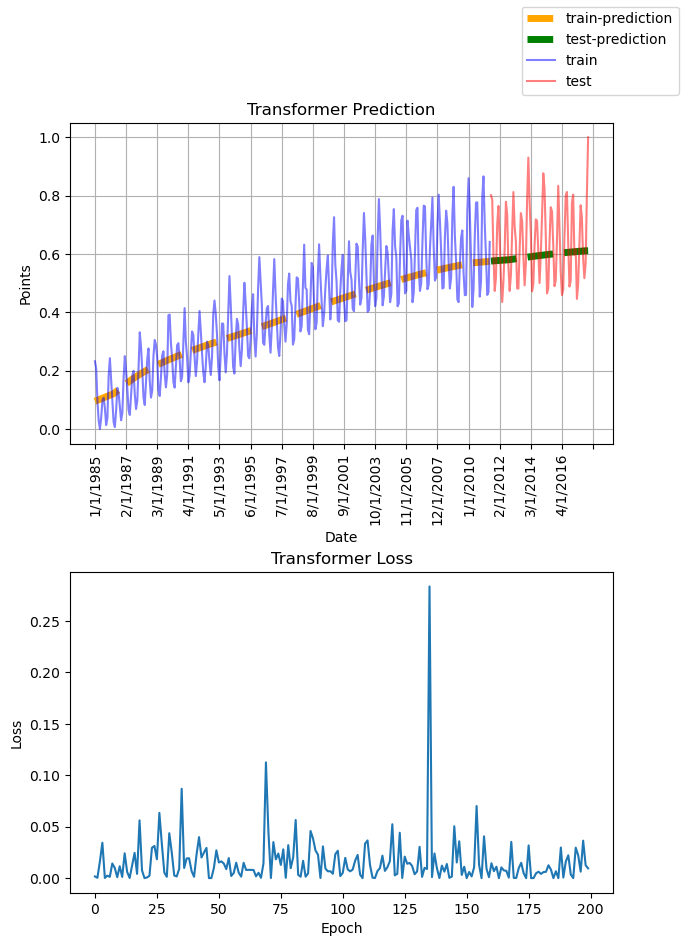

In [15]:
# instantiate model
model_kwargs = {
    'input_dim': data['sequence_length'],
    'num_layers': 2,
    'num_heads': 2,
    'dim_feedforward': 128,
    'sequence_length': data['sequence_length'],
}
model = Transformer(**model_kwargs)

# run train/evaluation
evaluation_kwargs = {
    'model': model,
    'num_epochs': 200,
    'lr': 0.0001,
}
evaluate_model(**evaluation_kwargs)